[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/keras-team/autokeras/blob/master/docs/templates/tutorial/image_classification.ipynb)

In [4]:
import tensorflow as tf
import autokeras as ak
tf.__version__, ak.__version__

('2.3.1', '1.0.11')

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

### Load MNIST dataset

In [6]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Training image shape:', x_train.shape) # (60000, 28, 28)
print('Training label shape:', y_train.shape) # (60000,)
print('First five training labels:', y_train[:5]) # array([5 0 4 1 9], dtype=uint8)

Training image shape: (60000, 28, 28)
Training label shape: (60000,)
First five training labels: [5 0 4 1 9]


### Run the ImageClassifier

In [7]:
import autokeras as ak

input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node1 = ak.ConvBlock()(output_node)
output_node2 = ak.ResNetBlock()(output_node)
output_node = ak.Merge()([output_node1, output_node2])
output_node = ak.ClassificationHead()(output_node)

auto_model = ak.AutoModel(
    inputs=input_node, 
    outputs=output_node,
    max_trials=3,
    seed=42)

auto_model.fit(x_train, y_train,epochs=3)

Trial 3 Complete [00h 02m 47s]
val_loss: 0.10812485963106155

Best val_loss So Far: 0.08590410649776459
Total elapsed time: 00h 08m 54s
INFO:tensorflow:Oracle triggered exit
Epoch 1/3
1875/1875 - 64s - loss: 0.2757 - accuracy: 0.9339
Epoch 2/3
1875/1875 - 62s - loss: 0.1763 - accuracy: 0.9678
Epoch 3/3
1875/1875 - 62s - loss: 0.0953 - accuracy: 0.9788
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


### Get the summarized results during the tuning process (return the best 10 models if existed)

In [8]:
auto_model.tuner.results_summary()

Results summary
Results in ./auto_model
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
conv_block_1/kernel_size: 3
conv_block_1/num_blocks: 2
conv_block_1/num_layers: 2
conv_block_1/separable: True
conv_block_1/max_pooling: True
conv_block_1/dropout: 0
conv_block_1/filters_0_0: 32
conv_block_1/filters_0_1: 32
conv_block_1/filters_1_0: 32
conv_block_1/filters_1_1: 32
res_net_block_1/pretrained: False
res_net_block_1/version: resnet50
res_net_block_1/imagenet_size: False
classification_head_1/dropout: 0
optimizer: adam
learning_rate: 0.001
Score: 0.08590410649776459
Trial summary
Hyperparameters:
conv_block_1/kernel_size: 3
conv_block_1/num_blocks: 2
conv_block_1/num_layers: 2
conv_block_1/separable: False
conv_block_1/max_pooling: True
conv_block_1/dropout: 0
conv_block_1/filters_0_0: 32
conv_block_1/filters_0_1: 32
conv_block_1/filters_1_0: 32
conv_block_1/filters_1_1: 32
res_net_block_1/pretrained: False
res_net_block_1/version: resne

### Retrieve best model

In [9]:
best_model = auto_model.export_model()
best_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
cast_to_float32 (CastToFloat32) (None, 28, 28)       0           input_1[0][0]                    
__________________________________________________________________________________________________
expand_last_dim (ExpandLastDim) (None, 28, 28, 1)    0           cast_to_float32[0][0]            
__________________________________________________________________________________________________
normalization (Normalization)   (None, 28, 28, 1)    3           expand_last_dim[0][0]            
_______________________________________________________________________________________

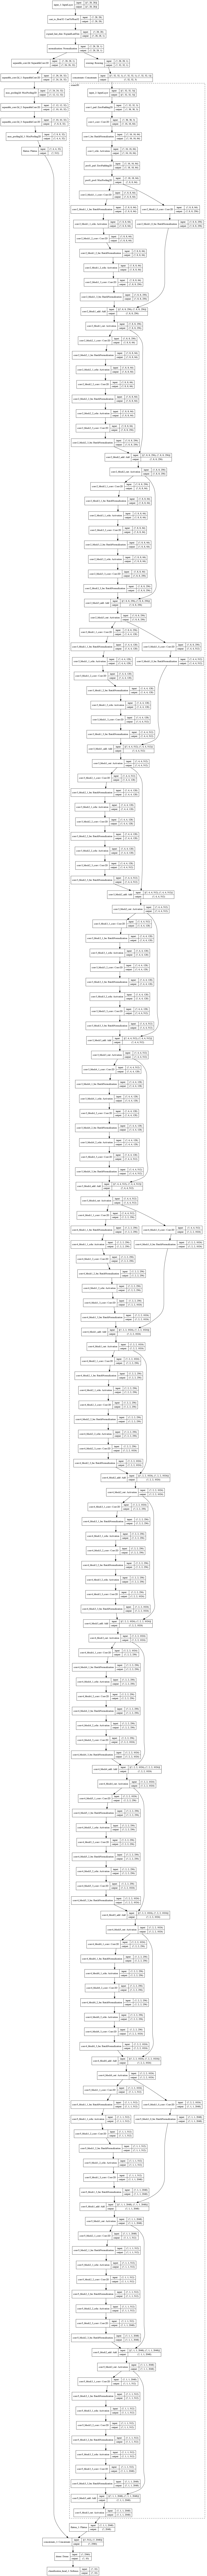

In [10]:
tf.keras.utils.plot_model(best_model, show_shapes=True, expand_nested=True) # rankdir='LR'


### Predict with the best model.


In [11]:
predicted_y = auto_model.predict(x_test)
print(predicted_y)

[['7']
 ['2']
 ['1']
 ...
 ['4']
 ['5']
 ['6']]


### Evaluate the best model on the test data.

In [12]:

test_loss, test_acc = auto_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', test_acc)


Test accuracy:  0.9821000099182129


### Fix some hyperparameters

In [9]:
import autokeras as ak

input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node1 = ak.ConvBlock()(output_node)
output_node2 = ak.ConvBlock(kernel_size = 3)(output_node)
output_node = ak.Merge(merge_type = 'concatenate')([output_node1, output_node2])
output_node = ak.ClassificationHead()(output_node)

auto_model = ak.AutoModel(
    inputs=input_node, 
    outputs=output_node,
    max_trials=3)

auto_model.fit(x_train, y_train,epochs=3, verbose=2)

Train for 1500 steps, validate for 375 steps
Epoch 1/3
1500/1500 - 35s - loss: 0.1339 - accuracy: 0.9603 - val_loss: 0.0578 - val_accuracy: 0.9837
Epoch 2/3
1500/1500 - 29s - loss: 0.0440 - accuracy: 0.9866 - val_loss: 0.0409 - val_accuracy: 0.9891
Epoch 3/3
1500/1500 - 28s - loss: 0.0308 - accuracy: 0.9906 - val_loss: 0.0445 - val_accuracy: 0.9889


Train for 1500 steps, validate for 375 steps
Epoch 1/3
1500/1500 - 29s - loss: 0.2068 - accuracy: 0.9367 - val_loss: 0.0636 - val_accuracy: 0.9804
Epoch 2/3
1500/1500 - 28s - loss: 0.0797 - accuracy: 0.9771 - val_loss: 0.0646 - val_accuracy: 0.9808
Epoch 3/3
1500/1500 - 30s - loss: 0.0642 - accuracy: 0.9815 - val_loss: 0.0491 - val_accuracy: 0.9862


Train for 1500 steps, validate for 375 steps
Epoch 1/3
1500/1500 - 37s - loss: 0.1975 - accuracy: 0.9402 - val_loss: 0.1006 - val_accuracy: 0.9709
Epoch 2/3
1500/1500 - 30s - loss: 0.0950 - accuracy: 0.9706 - val_loss: 0.0698 - val_accuracy: 0.9805
Epoch 3/3
1500/1500 - 33s - loss: 0.0725 - accuracy: 0.9770 - val_loss: 0.0644 - val_accuracy: 0.9805


INFO:tensorflow:Oracle triggered exit
Train for 1875 steps, validate for 375 steps
Epoch 1/3
1875/1875 - 38s - loss: 0.1192 - accuracy: 0.9650 - val_loss: 0.0366 - val_accuracy: 0.9890
Epoch 2/3
1875/1875 - 35s - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0214 - val_accuracy: 0.9938
Epoch 3/3
1875/1875 - 33s - loss: 0.0290 - accuracy: 0.9914 - val_loss: 0.0124 - val_accuracy: 0.9971


### Display the best model

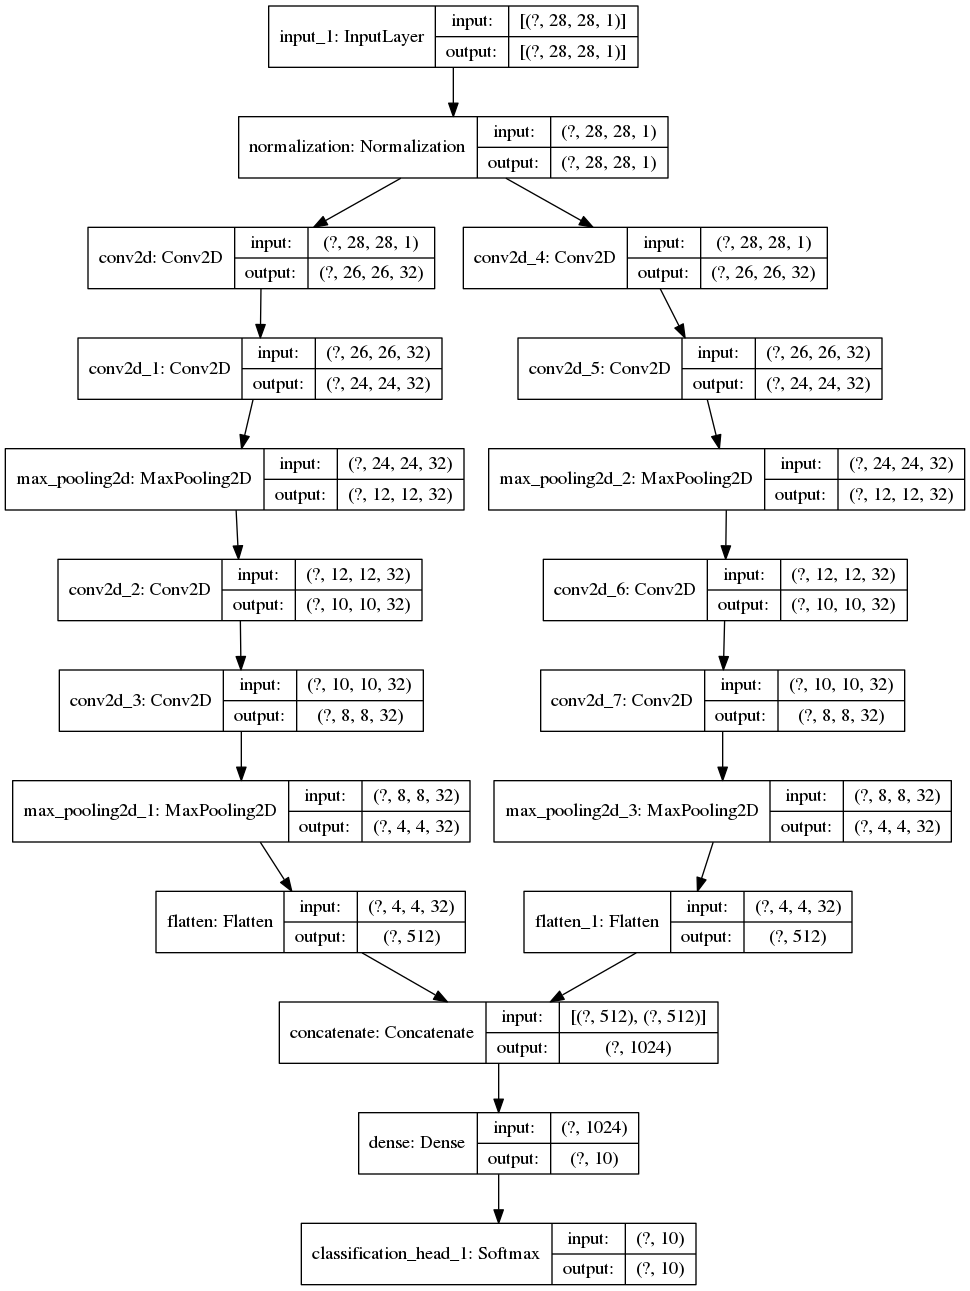

In [10]:
best_model = auto_model.export_model()
tf.keras.utils.plot_model(best_model, show_shapes=True, expand_nested=True) # rankdir='LR'

In [11]:
best_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
normalization (Normalization)   (None, 28, 28, 1)    3           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 26, 26, 32)   320         normalization[0][0]              
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 26, 26, 32)   320         normalization[0][0]              
______________________________________________________________________________________________

## Reference
[ImageClassifier](/image_classifier),
[AutoModel](/auto_model/#automodel-class),
[ImageBlock](/block/#imageblock-class),
[Normalization](/preprocessor/#normalization-class),
[ImageAugmentation](/preprocessor/#image-augmentation-class),
[ResNetBlock](/block/#resnetblock-class),
[ImageInput](/node/#imageinput-class),
[ClassificationHead](/head/#classificationhead-class).